# TRAINING of ML Model :
Google Colab (T4 GPU)
1.	Architecture : Ultralytics Yolov5 (small, segmentation)
2.	Framework : Pytorch
3.  Problem statement : "Image Instance-Segmentation of Class - Containers"

Reference : Roboflow Yolov5 training tutorial - https://colab.research.google.com/github/roboflow-ai/yolov5-custom-training-tutorial/blob/main/yolov5-custom-training.ipynb

In [4]:
%cd /content/drive/MyDrive/HSC2023/MyTrain_yolov5 #get into the G-drive
import os
HOME = os.getcwd()
print(HOME)

/content/drive/MyDrive/HSC2023/MyTrain_yolov5
/content/drive/MyDrive/HSC2023/MyTrain_yolov5


In [8]:
!git clone https://github.com/ultralytics/yolov5.git # clone repo
%cd yolov5
%pip install -r requirements.txt # install

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.6/190.6 kB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 24.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 645.2/645.2 kB 37.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 8.6 MB/s eta 0:00:00
  Attempting uninstall: Pillow
    Found existing installation: Pillow 9.4.0
    Uninstalling Pillow-9.4.0:
      Successfully uninstalled Pillow-9.4.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
imageio 2.31.6 requires pillow<10.1.0,>=8.3.2, but you have pillow 10.1.0 which is incompatible.


In [9]:
import torch
import utils
display = utils.notebook_init()  # checks

YOLOv5 🚀 v7.0-238-gd5d514e Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)


Setup complete ✅ (2 CPUs, 12.7 GB RAM, 27.1/78.2 GB disk)


In [4]:
from utils.downloads import attempt_download

p5 = ['n', 's', 'm', 'l', 'x']  # P5 models
cls = [f'{x}-seg' for x in p5]  # segmentation models

for x in cls:
    attempt_download(f'weights/yolov5{x}.pt')

100%|██████████| 4.11M/4.11M [00:00<00:00, 40.6MB/s]

100%|██████████| 14.9M/14.9M [00:00<00:00, 110MB/s] 

100%|██████████| 42.4M/42.4M [00:00<00:00, 158MB/s]

100%|██████████| 91.9M/91.9M [00:00<00:00, 153MB/s]

100%|██████████| 170M/170M [00:00<00:00, 178MB/s]



In [5]:
#Download example image
import requests
image_url = "https://i.imgur.com/EbOBS5l.jpg"
img_data = requests.get(image_url).content
with open('zebra.jpg', 'wb') as handler:
    handler.write(img_data)

segment/predict: weights=['./weights/yolov5s-seg.pt'], source=zebra.jpg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/predict-seg, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1, retina_masks=False
YOLOv5 🚀 v7.0-238-gd5d514e Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
YOLOv5s-seg summary: 224 layers, 7611485 parameters, 0 gradients, 26.4 GFLOPs
image 1/1 /content/drive/MyDrive/HSC2023/MyTrain_yolov5/yolov5/zebra.jpg: 448x640 1 zebra, 53.2ms
Speed: 0.6ms pre-process, 53.2ms inference, 254.0ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/predict-seg/exp2


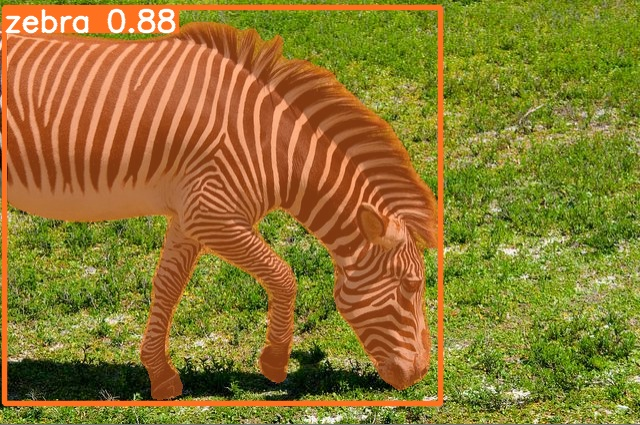

In [4]:
#Infer using segment/predict.py
!python segment/predict.py --weights ./weights/yolov5s-seg.pt --source zebra.jpg
display.Image(filename='runs/predict-seg/exp/zebra.jpg', width=600)

In [7]:
torch.hub.download_url_to_file('https://ultralytics.com/assets/coco128-seg.zip', 'tmp.zip') # for validation get the whole coco-seg dataset
!unzip -q tmp.zip -d ../datasets && rm tmp.zip  # unzip

100%|██████████| 6.79M/6.79M [00:00<00:00, 70.7MB/s]


In [8]:
!python segment/val.py --weights yolov5s-seg.pt --data coco128-seg.yaml --img 640

segment/val: data=/content/drive/MyDrive/HSC2023/MyTrain_yolov5/yolov5/data/coco128-seg.yaml, weights=['yolov5s-seg.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.6, max_det=300, task=val, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val-seg, name=exp, exist_ok=False, half=False, dnn=False
YOLOv5 🚀 v7.0-238-gd5d514e Python-3.10.12 torch-2.1.0+cu118 CPU

100% 14.9M/14.9M [00:00<00:00, 108MB/s] 

Fusing layers... 
YOLOv5s-seg summary: 224 layers, 7611485 parameters, 0 gradients, 26.4 GFLOPs
val: Scanning /content/drive/MyDrive/HSC2023/MyTrain_yolov5/datasets/coco128-seg/labels/train2017... 126 images, 2 backgrounds, 0 corrupt: 100% 128/128 [00:00<00:00, 144.99it/s]
val: New cache created: /content/drive/MyDrive/HSC2023/MyTrain_yolov5/datasets/coco128-seg/labels/train2017.cache
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     M

MY CUSTOM DATASET Pulling, Training and validation starts 

In [5]:
!pip install roboflow --quiet

from roboflow import Roboflow
rf = Roboflow(api_key="HABgns1n6AARdtYS3xSz")
project = rf.workspace("project-gvpak").project("container-detection-1v0zy")
dataset = project.version(7).download("yolov5")


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.3/63.3 kB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 19.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.2/72.2 kB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 7.0 MB/s eta 0:00:00
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Container-Detection-7 in yolov5pytorch:: 100%|██████████| 4392/4392 [00:25<00:00, 172.25it/s]


In [6]:
#get into yolov5 directory
%cd yolov5
%pwd

/content/drive/MyDrive/HSC2023/MyTrain_yolov5/yolov5


'/content/drive/MyDrive/HSC2023/MyTrain_yolov5/yolov5'

# CHALLENGE FACED :
My dataset had some images improportionate mix of Segment and bounding boxes. 

Causing a warning and not able to train:
“WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 188, len(boxes) = 203. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.”

Solution:
Prepared a simple python code to read json of all labels and find those images who’s len(segments) != len(boxes) and printed it. It was around 43 images which later I manually removed using terminal command rm. The printed filenames are in "ProblematicImages_whichToBeRemoved.txt"

removing the problematic images and labels out from my dataset -

In [9]:
%cd /content/drive/MyDrive/HSC2023/MyTrain_yolov5/yolov5/Container-Detection-7/test/labels
%rm '2de8cf2a4ccc50f9ace04938f17b40eded63dbc1_jpg.rf.0babdab632eecfc512c5bdcee39dbf99.txt'
%cd /content/drive/MyDrive/HSC2023/MyTrain_yolov5/yolov5/Container-Detection-7/test/images
%rm '2de8cf2a4ccc50f9ace04938f17b40eded63dbc1_jpg.rf.0babdab632eecfc512c5bdcee39dbf99.jpg'

/content/drive/MyDrive/HSC2023/MyTrain_yolov5/yolov5/Container-Detection-7/test/labels
/content/drive/MyDrive/HSC2023/MyTrain_yolov5/yolov5/Container-Detection-7/test/images


In [10]:
%cd /content/drive/MyDrive/HSC2023/MyTrain_yolov5/yolov5/Container-Detection-7/valid/images
%rm "0012_jpg.rf.096defd46d68bac7f46fcf4ceab19135.jpg" "fa7bade8308e44b31f26106f9a5238674d43b9b4_jpg.rf.482616e172178f6a6f930e7889d1c075.jpg" "448_png.rf.5c9d68031625d3016db017364913e5d8.jpg" "325_png.rf.796a4070d64aadd345f2fb6a908f916b.jpg" "476_png.rf.7f8b8275e47a8528a13740a45a1fe6b8.jpg" "86a47d988ef2f8d07e2d45852d8d346f0e13d7b6_jpg.rf.81b4c62a1a015fd3867402bda095b2af.jpg" "324_png.rf.93dca89b848dd5265dfce4667543f7e2.jpg" "323_png.rf.a01e83bab159d57999195fe7922ba454.jpg" "dafc47d0a5f40c20146b09d375167aeb021e0089_jpg.rf.a9f9addb3d025a168d0b482f519c5b2b.jpg" "326_png.rf.b84c8c6a502a0aba24278b887271394b.jpg" "429_png.rf.bcebcfafa69c90ae3c7225d4f03a7c41.jpg" "326_png.rf.cb1670d1e1520014847d98235a6d61fa.jpg" "584_png.rf.f05e4cd2806a4341114188561d5ab2b2.jpg"
%cd /content/drive/MyDrive/HSC2023/MyTrain_yolov5/yolov5/Container-Detection-7/valid/labels
%rm "0012_jpg.rf.096defd46d68bac7f46fcf4ceab19135.txt" "fa7bade8308e44b31f26106f9a5238674d43b9b4_jpg.rf.482616e172178f6a6f930e7889d1c075.txt" "448_png.rf.5c9d68031625d3016db017364913e5d8.txt" "325_png.rf.796a4070d64aadd345f2fb6a908f916b.txt" "476_png.rf.7f8b8275e47a8528a13740a45a1fe6b8.txt" "86a47d988ef2f8d07e2d45852d8d346f0e13d7b6_jpg.rf.81b4c62a1a015fd3867402bda095b2af.txt" "324_png.rf.93dca89b848dd5265dfce4667543f7e2.txt" "323_png.rf.a01e83bab159d57999195fe7922ba454.txt" "dafc47d0a5f40c20146b09d375167aeb021e0089_jpg.rf.a9f9addb3d025a168d0b482f519c5b2b.txt" "326_png.rf.b84c8c6a502a0aba24278b887271394b.txt" "429_png.rf.bcebcfafa69c90ae3c7225d4f03a7c41.txt" "326_png.rf.cb1670d1e1520014847d98235a6d61fa.txt" "584_png.rf.f05e4cd2806a4341114188561d5ab2b2.txt"

/content/drive/MyDrive/HSC2023/MyTrain_yolov5/yolov5/Container-Detection-7/valid/images
/content/drive/MyDrive/HSC2023/MyTrain_yolov5/yolov5/Container-Detection-7/valid/labels


In [11]:
%cd /content/drive/MyDrive/HSC2023/MyTrain_yolov5/yolov5/Container-Detection-7/train/images
%rm 'a0c8375198b2959bf95d450c08d0ddd9e8338c53_jpg.rf.8b97820600b4c670de6a2ecdf878474c.jpg' '352_png.rf.8c8c97b16e8a38784fe80c3abdbda020.jpg' '0dcb6876b52566b425389f3eabf515ac44073828_jpg.rf.9370fa5d90b91505cfe9eedbe54b118c.jpg' '352_png.rf.9774693e97a164bfd2e95c64ec3daa17.jpg' '350_png.rf.98d1380ee60b7020dc0c3150ffe37802.jpg' '431_png.rf.9eef18fcb75e4ea092013159e827c2ed.jpg' '433_png.rf.a8c994ab995fb02fa21dc83c94603d0e.jpg' '585_png.rf.acd88e15c4c33539c9d995f6ff3dca3f.jpg' '351_png.rf.b2db87ed7cfb02d70c2ab765ef46195e.jpg' 'a0c8375198b2959bf95d450c08d0ddd9e8338c53_jpg.rf.b2edbd92c2d8953ebf5aa147d3690ef2.jpg' '0dcb6876b52566b425389f3eabf515ac44073828_jpg.rf.ba0f688347e132d8b82d65ce7210d9b2.jpg' '585_png.rf.bb6f9b6272609bc24caf9e8cc2200564.jpg' '532_png.rf.bb79176ac726bdd03433dc55a509482c.jpg' '585_png.rf.bfbdd1f431b97e4b98bc3bb86bbbbdaa.jpg' '433_png.rf.c39510f1b25381337b0b42877ff88700.jpg' '431_png.rf.c5e7240aef99d5ef5a2741f5803a858a.jpg' '324_png.rf.c7e9f5ef3ab2f791da8a43140cc7391e.jpg' '532_png.rf.c861fa78022def698ff20ea40c0d06c2.jpg' 'be78cc8b07d62a95225e51ef76cbeceaab31388b_jpg.rf.fab5477a9ff66c195c23d8ac6e6ac411.jpg' '323_png.rf.1f1835af03958a5f149689a530b91005.jpg' '352_png.rf.23f754bf0308b891a3f679e00574813b.jpg' '350_png.rf.30db008c132ea9ecf9145d1996624dcd.jpg' '447_png.rf.32951be29c3e7fe86ce07dd7c3afa56a.jpg' '447_png.rf.03c0575c8e75fc1f8c13c95791192472.jpg' '351_png.rf.0f31fe08553766e57b9380f9f5bcdfaf.jpg' '0dcb6876b52566b425389f3eabf515ac44073828_jpg.rf.14070a3ed144717fd5b4ab98d986bb00.jpg' '447_png.rf.15b771a2fa9b908a34626e27f23420cd.jpg' 'a0c8375198b2959bf95d450c08d0ddd9e8338c53_jpg.rf.d358b022ace9423a871e0e5fdea2b0c1.jpg' '351_png.rf.e04ddaee1d8851a3fa37cec6b89ac554.jpg' '323_png.rf.e6dddc0d4d38599b0879d4e9b1b40dec.jpg' '323_png.rf.f61e7d2962a816f4c3c633d77bdf9cb7.jpg' 'be78cc8b07d62a95225e51ef76cbeceaab31388b_jpg.rf.3e328b90b5b48b4be010e0e169e3a58c.jpg' '9b07dfd19888f23ed0328542be1b641f671bf70b_jpg.rf.4268a25ea67a53ee3263d34dba8d3af1.jpg' '324_png.rf.4dff15ed695f0baed5e9986dde5677b1.jpg' '532_png.rf.4eaf2919f33480f105e053f38251506a.jpg' '350_png.rf.4fbb8a422f97a91072858fd4a7748286.jpg' '433_png.rf.77192942ec7726509ed718a5b8bad25a.jpg' '9b07dfd19888f23ed0328542be1b641f671bf70b_jpg.rf.78ed2132c833d64d2ef17404a0c3c10d.jpg' 'be78cc8b07d62a95225e51ef76cbeceaab31388b_jpg.rf.7f6a2864d705770f4ae5dfcbf037bfe7.jpg' '9b07dfd19888f23ed0328542be1b641f671bf70b_jpg.rf.8160ac557ec83764c1163cb30a8eae75.jpg' '431_png.rf.850cc11ee3cce8ce7f65dc1a30b83606.jpg'
%cd /content/drive/MyDrive/HSC2023/MyTrain_yolov5/yolov5/Container-Detection-7/train/labels
%rm 'a0c8375198b2959bf95d450c08d0ddd9e8338c53_jpg.rf.8b97820600b4c670de6a2ecdf878474c.txt' '352_png.rf.8c8c97b16e8a38784fe80c3abdbda020.txt' '0dcb6876b52566b425389f3eabf515ac44073828_jpg.rf.9370fa5d90b91505cfe9eedbe54b118c.txt' '352_png.rf.9774693e97a164bfd2e95c64ec3daa17.txt' '350_png.rf.98d1380ee60b7020dc0c3150ffe37802.txt' '431_png.rf.9eef18fcb75e4ea092013159e827c2ed.txt' '433_png.rf.a8c994ab995fb02fa21dc83c94603d0e.txt' '585_png.rf.acd88e15c4c33539c9d995f6ff3dca3f.txt' '351_png.rf.b2db87ed7cfb02d70c2ab765ef46195e.txt' 'a0c8375198b2959bf95d450c08d0ddd9e8338c53_jpg.rf.b2edbd92c2d8953ebf5aa147d3690ef2.txt' '0dcb6876b52566b425389f3eabf515ac44073828_jpg.rf.ba0f688347e132d8b82d65ce7210d9b2.txt' '585_png.rf.bb6f9b6272609bc24caf9e8cc2200564.txt' '532_png.rf.bb79176ac726bdd03433dc55a509482c.txt' '585_png.rf.bfbdd1f431b97e4b98bc3bb86bbbbdaa.txt' '433_png.rf.c39510f1b25381337b0b42877ff88700.txt' '431_png.rf.c5e7240aef99d5ef5a2741f5803a858a.txt' '324_png.rf.c7e9f5ef3ab2f791da8a43140cc7391e.txt' '532_png.rf.c861fa78022def698ff20ea40c0d06c2.txt' 'be78cc8b07d62a95225e51ef76cbeceaab31388b_jpg.rf.fab5477a9ff66c195c23d8ac6e6ac411.txt' '323_png.rf.1f1835af03958a5f149689a530b91005.txt' '352_png.rf.23f754bf0308b891a3f679e00574813b.txt' '350_png.rf.30db008c132ea9ecf9145d1996624dcd.txt' '447_png.rf.32951be29c3e7fe86ce07dd7c3afa56a.txt' '447_png.rf.03c0575c8e75fc1f8c13c95791192472.txt' '351_png.rf.0f31fe08553766e57b9380f9f5bcdfaf.txt' '0dcb6876b52566b425389f3eabf515ac44073828_jpg.rf.14070a3ed144717fd5b4ab98d986bb00.txt' '447_png.rf.15b771a2fa9b908a34626e27f23420cd.txt' 'a0c8375198b2959bf95d450c08d0ddd9e8338c53_jpg.rf.d358b022ace9423a871e0e5fdea2b0c1.txt' '351_png.rf.e04ddaee1d8851a3fa37cec6b89ac554.txt' '323_png.rf.e6dddc0d4d38599b0879d4e9b1b40dec.txt' '323_png.rf.f61e7d2962a816f4c3c633d77bdf9cb7.txt' 'be78cc8b07d62a95225e51ef76cbeceaab31388b_jpg.rf.3e328b90b5b48b4be010e0e169e3a58c.txt' '9b07dfd19888f23ed0328542be1b641f671bf70b_jpg.rf.4268a25ea67a53ee3263d34dba8d3af1.txt' '324_png.rf.4dff15ed695f0baed5e9986dde5677b1.txt' '532_png.rf.4eaf2919f33480f105e053f38251506a.txt' '350_png.rf.4fbb8a422f97a91072858fd4a7748286.txt' '433_png.rf.77192942ec7726509ed718a5b8bad25a.txt' '9b07dfd19888f23ed0328542be1b641f671bf70b_jpg.rf.78ed2132c833d64d2ef17404a0c3c10d.txt' 'be78cc8b07d62a95225e51ef76cbeceaab31388b_jpg.rf.7f6a2864d705770f4ae5dfcbf037bfe7.txt' '9b07dfd19888f23ed0328542be1b641f671bf70b_jpg.rf.8160ac557ec83764c1163cb30a8eae75.txt' '431_png.rf.850cc11ee3cce8ce7f65dc1a30b83606.txt'

/content/drive/MyDrive/HSC2023/MyTrain_yolov5/yolov5/Container-Detection-7/train/images
/content/drive/MyDrive/HSC2023/MyTrain_yolov5/yolov5/Container-Detection-7/train/labels


Done. Now dataset is all read to get trained.

In [12]:
%cd /content/drive/MyDrive/HSC2023/MyTrain_yolov5/yolov5 # moving to the Working directory

/content/drive/MyDrive/HSC2023/MyTrain_yolov5/yolov5


# TRANSFER LEARNING Starts
Learning through past error workflows -

1. Reference to my error : https://github.com/Xilinx/Vitis-AI/issues/1252
Thread:
Yes, the SiLU function is not supported (as seen here https://docs.xilinx.com/r/en-US/ug1414-vitis-ai/Currently-Supported-Operators). You need to replace it with LeakyReLU. The specific files that need to be modified are the common.py and experimental.py files, located in yolov5/models/, which are modified as follows.

#old
self.act = nn.SiLU
#new
self.act = nn.LeakyReLU(0.1, inplace=True)

LEARNING -
What we understood is, Xilinx doesn't support SiLU activation fucntion, so in yolo architecture the SiLU need to be replaced to some other non-linear activation function i.e. ReLU, Leaky-ReLU.

2. I went into the common.py and experiment.py, modified the activation fucntion from SiLU to LeakyReLU. And further proceeded to train.

Note : COCO weights still can be applied irrespective of modified activation function. Bcz its only synaptic weight not activation function depended.

3. Perform train

In [14]:
!python segment/train.py --img 640 --batch 16 --epochs 100 --data {dataset.location}/data.yaml --weights yolov5s-seg.pt

2023-11-05 21:16:52.821195: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-05 21:16:52.821247: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-05 21:16:52.821286: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
segment/train: weights=yolov5s-seg.pt, cfg=, data=/content/drive/MyDrive/HSC2023/MyTrain_yolov5/yolov5/Container-Detection-7/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=100, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, 

# Results of training (Pre-quantisated evaluation of metrics)

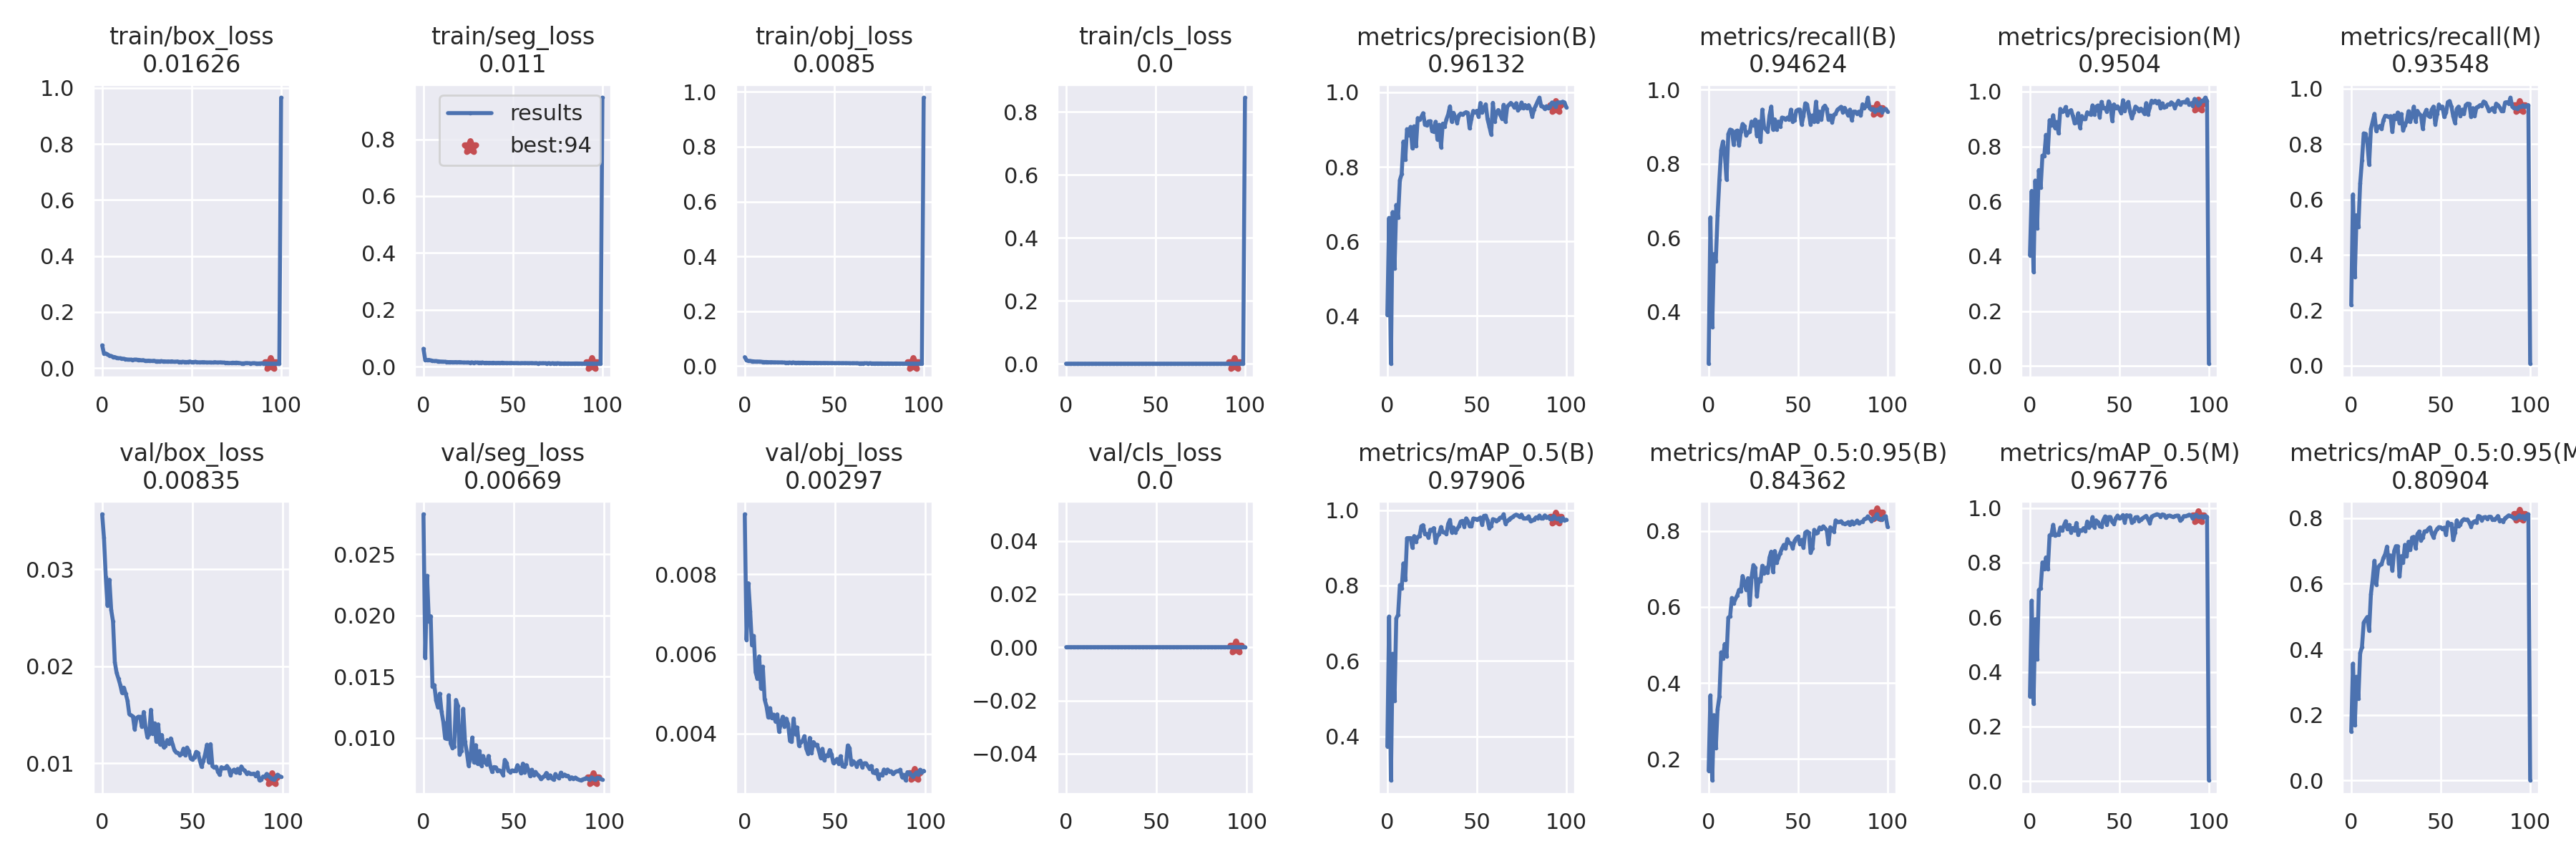

In [10]:
display.Image(filename=f'runs/train-seg/exp4/results.png', width=1200)

In [12]:
!python segment/val.py --weights runs/train-seg/exp4/weights/best.pt --data /content/drive/MyDrive/HSC2023/MyTrain_yolov5/yolov5/Container-Detection-7/data.yaml --img 640

segment/val: data=/content/drive/MyDrive/HSC2023/MyTrain_yolov5/yolov5/Container-Detection-7/data.yaml, weights=['runs/train-seg/exp4/weights/best.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.6, max_det=300, task=val, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val-seg, name=exp, exist_ok=False, half=False, dnn=False
YOLOv5 🚀 v7.0-238-gd5d514e Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 165 layers, 7398422 parameters, 0 gradients, 25.7 GFLOPs
val: Scanning /content/drive/MyDrive/HSC2023/MyTrain_yolov5/yolov5/Container-Detection-7/valid/labels.cache... 175 images, 0 backgrounds, 0 corrupt: 100% 175/175 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100% 6/6 [00:12<00:00,  2.10s/it]
                   all        17

# Simple Inferencing using our new trained ML model

In [13]:
!python segment/predict.py --img 640 --weights runs/train-seg/exp4/weights/best.pt --source /content/drive/MyDrive/HSC2023/MyTrain_yolov5/yolov5/Container-Detection-7/test/images/329_png.rf.ddc788fbf964957097238c301ac479bf.jpg


segment/predict: weights=['runs/train-seg/exp4/weights/best.pt'], source=/content/drive/MyDrive/HSC2023/MyTrain_yolov5/yolov5/Container-Detection-7/test/images/329_png.rf.ddc788fbf964957097238c301ac479bf.jpg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/predict-seg, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1, retina_masks=False
YOLOv5 🚀 v7.0-238-gd5d514e Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 165 layers, 7398422 parameters, 0 gradients, 25.7 GFLOPs
image 1/1 /content/drive/MyDrive/HSC2023/MyTrain_yolov5/yolov5/Container-Detection-7/test/images/329_png.rf.ddc788fbf964957097238c301ac479bf.jpg: 640x640 1 Healthy Container, 14.7ms
Speed: 0.7

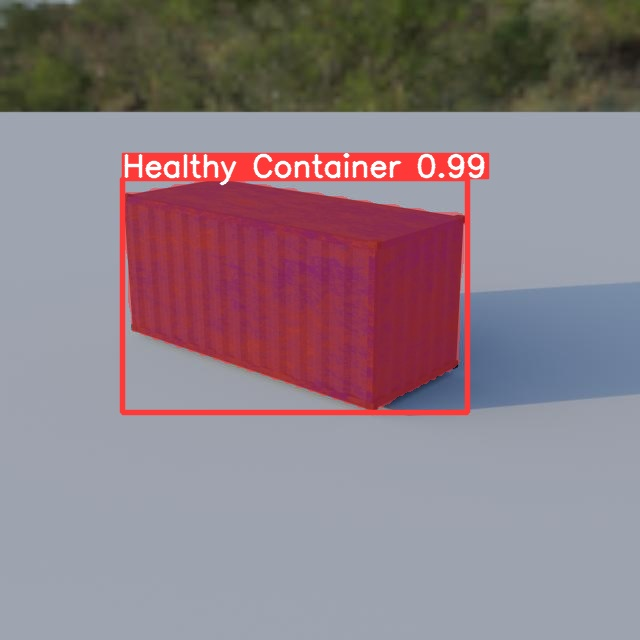

In [14]:
display.Image(filename=f'runs/predict-seg/exp3/329_png.rf.ddc788fbf964957097238c301ac479bf.jpg', width=600)

# After training and satisfying metrics. 

The .pt model file will be available in the folder -> runs/training/exp/weights/best.pt

This best.pt along with class definition of yolov5 is the actual MODEL. Which we can take it to Vitis-ai environment in IPC lab and do model Quantisation, Compilation for our Target DPU architecure. 

The further workflow is in "MyNotebook_Quantisation_Compilation.ipynb" file.